# Importation des données et des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("bird.csv")
data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


## Analyse des données

In [3]:
print(f"Le nombre d'attributs dans la dataframe est : {data.shape[1]}")
print(f"Le nombre d'observations dans la dataframe est : {data.shape[0]}")

Le nombre d'attributs dans la dataframe est : 12
Le nombre d'observations dans la dataframe est : 420


In [4]:
print("Les statistiques du dataframe avant le pré traitement sont :\n")
data.describe()

Les statistiques du dataframe avant le pré traitement sont :



,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,209.500000,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,121.387808,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,104.750000,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,209.500000,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,314.250000,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [5]:
data.dtypes.value_counts()

float64    10
int64       1
object      1
dtype: int64

[]

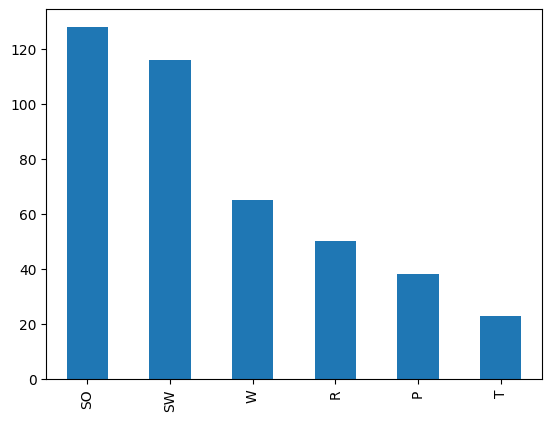

In [6]:
counts_by_class = data["type"].value_counts()
counts_by_class.plot(kind='bar')
plt.plot()

In [7]:
data.duplicated().sum()
data.drop("id",axis=1).duplicated().sum()

0

In [8]:
data.isna().sum().sum()

15

In [9]:
data.isna().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

## Prétraitement des données 

In [10]:
data.drop("id", axis=1, inplace=True)

In [11]:
numeric_columns = data.select_dtypes(exclude = "object").columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [12]:
data.isna().sum().sum()

0

In [13]:
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0.300328,0.810948,0.049477,0.588709,0.248025,0.237333,-1.569191,0.408341,-0.022914,0.417332,SW
1,0.451707,0.793391,0.195108,0.914558,0.510739,0.534545,0.412627,0.639569,0.098146,0.495297,SW
2,0.285246,0.702092,0.002472,0.772286,0.311317,0.336403,0.283459,0.413158,-0.039776,0.188023,SW
3,0.242048,0.466824,-0.057353,0.538225,0.159114,0.148169,0.119545,0.104853,-0.149162,0.220126,SW
4,-0.034456,0.164838,-0.291011,0.060925,-0.146799,-0.248115,-0.222605,-0.107107,-0.317781,0.091713,SW
...,...,...,...,...,...,...,...,...,...,...,...
415,-0.869369,-0.962343,-0.852339,-1.040536,-0.929917,-0.832632,-0.886217,-0.892321,-0.745382,-0.816351,SO
416,-0.846094,-0.958832,-0.826529,-0.967105,-0.885713,-0.877214,-0.834231,-0.916407,-0.675773,-0.816351,SO
417,-0.853914,-0.962343,-0.842425,-0.948748,-0.799314,-0.887121,-0.801342,-0.853782,-0.707767,-0.788834,SO
418,-0.824309,-0.909671,-0.796274,-0.962516,-0.779723,-0.862354,-0.757844,-0.795975,-0.572872,-0.775076,SO


In [14]:
encoder = LabelEncoder()
data["type"] = encoder.fit_transform(data["type"])
data["type"]

0      3
1      3
2      3
3      3
4      3
      ..
415    2
416    2
417    2
418    2
419    2
Name: type, Length: 420, dtype: int32

In [30]:
data.to_csv('donnees_traitees.csv')

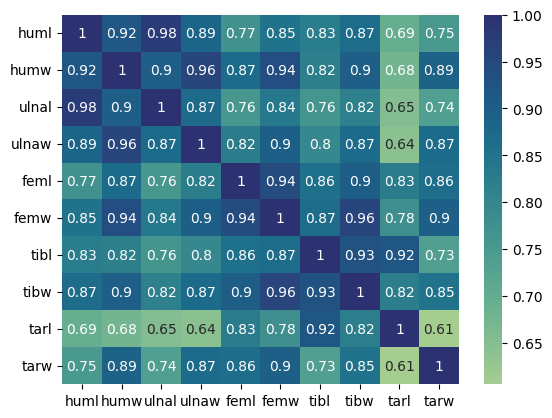

In [15]:
correlation = data[numeric_columns].corr()

sns.heatmap(correlation, annot=True,  cmap="crest")
plt.plot()
plt.show()

In [16]:
pca = PCA(n_components=10)
pca.fit(data[numeric_columns])

PCA(n_components=10)

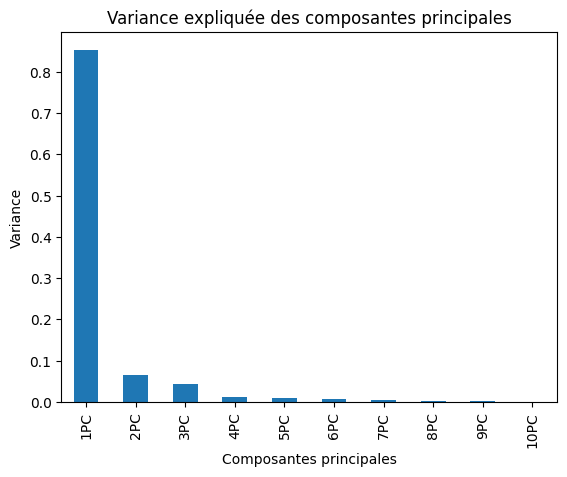

In [17]:
pca_ratio = pd.Series(pca.explained_variance_ratio_)

mylabels = [str(j+1)+"PC" for j in range(10)]
pca_ratio.plot(kind = 'bar')
plt.xticks(np.arange(10), mylabels)
plt.title("Variance expliquée des composantes principales")
plt.ylabel("Variance")
plt.xlabel("Composantes principales")
plt.show()

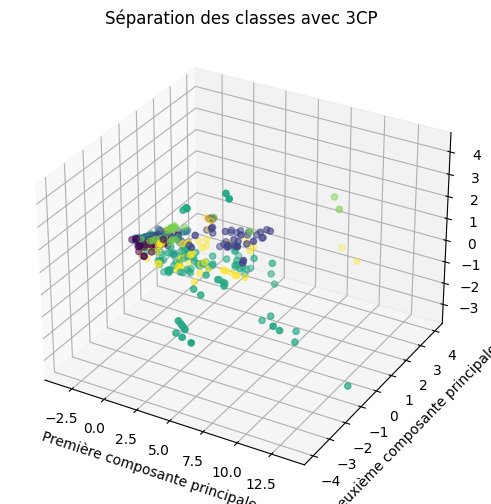

In [18]:
X_PCA = pca.transform(data[numeric_columns])

labels = data["type"].tolist()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')
ax.set_zlabel('Troisième composante principale')
plt.title('Séparation des classes avec 3CP')
plt.show()

## Classification des données

### Données

In [19]:
X = data[numeric_columns]
y = data["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### N-Voisins

#### Paramètres naïfs

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7261904761904762

#### Paramètres optimisés avec GridSearch

In [21]:
parameters = {
    'n_neighbors':np.arange(1,11),
    'metric': ["minkowski", "euclidean", "cityblock"]
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, parameters, scoring="accuracy", error_score='raise')
knn_gs.fit(X_train, y_train)

s, p = knn_gs.score(X_test, y_test), knn_gs.best_params_
print(f"Meilleurs paramètres : {p}, précision : {s}")

Meilleurs paramètres : {'metric': 'minkowski', 'n_neighbors': 1}, précision : 0.8452380952380952


### Régression logistique

#### Paramètres naïfs

In [22]:
lr = LogisticRegression(random_state=42, C=5, max_iter=1000, solver='liblinear')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8333333333333334

#### Paramètres optimisés avec GridSearch

In [23]:
parameters = {
    'penalty':['l1', 'l2'], 
    'C': np.logspace(-3, 1, 20)
}

lr_gs = GridSearchCV(lr, parameters, scoring="accuracy", error_score='raise')
lr_gs.fit(X_train, y_train)
s, p = lr_gs.score(X_test, y_test), lr_gs.best_params_

print(f"Meilleurs paramètres : {p}, précision : {s}")

Meilleurs paramètres : {'C': 10.0, 'penalty': 'l1'}, précision : 0.8809523809523809


### Centroïdes

#### Paramètres naïfs

In [24]:
ct = NearestCentroid()
ct.fit(X_train, y_train)
ct.score(X_test, y_test)

0.4880952380952381

#### Paramètres optimisés avec GridSearch

In [25]:
parameters = {
    'metric': ["euclidean", "manhattan"]
}

ct_gs = GridSearchCV(ct, parameters, scoring="accuracy", error_score='raise', refit=True)
ct_gs.fit(X_train, y_train)
s, p = ct_gs.score(X_test, y_test), ct_gs.best_params_

print(f"Meilleurs paramètres : {p}, précision : {s}")

Meilleurs paramètres : {'metric': 'manhattan'}, précision : 0.47619047619047616
